# Let's Get That Data!

## NOTE: this is an old notebook file.  
### To see my project please go to the notebook file named Doggos-vs-Kittehs   
### it should be in the same repo. thanks!

In [1]:
#First, The Imports
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# Every returned Out[] is displayed, not just the last one. (Thanks NaRae!)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# the key variables
consumerKey = "XXXXXXX"
consumerSecret ="XXXXXX"

In [3]:
#authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#connecting to Twitter API
api = tweepy.API(auth)

In [4]:
# this is helpful for later but I need to read in the .csv files so I can append them later
#tcat = pd.read_csv(r'cat_tweets.csv')
#tdog = pd.read_csv(r'dog_tweets.csv')
filepath = "/Users/Margaret/Documents/Data_Science/Project_Margaret/"

In [ ]:
#getting cat and dog search results
#NOTE: The dog neologisms I will compare: doggo and doge
#NOTE: The cat neologisms I will compare: kitteh and toebeans
rDog = api.search(q='%23dog')
rDogs = api.search(q='%23dogs')
rDoggo = api.search(q='%23doggo')
rDoge = api.search(q='%23doge')
rCat = api.search(q='%23cat')
rCats = api.search(q='%23cats')
rToeBeans = api.search(q='%23toebeans')
rKitteh = api.search(q='%23kitteh')

In [ ]:
#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23dog').items(1000):
    rDog.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doggo').items(1000):
    rDoggo.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doge').items(1000):
    rDoge.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cat').items(1000):
    rCat.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23toebeans').items(1000):
    rToeBeans.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23kitteh').items(1000):
    rKitteh.append(tweet)

In [ ]:
#Adding in the plurals
#for tweet in tweepy.Cursor(api.search, q='%23dogs').items(1000):
#    rDogs.append(tweet)
#for tweet in tweepy.Cursor(api.search, q='%23cats').items(1000):
#    rCats.append(tweet)

In [ ]:
#Verify the number of items returned
len(rDog)
len(rDogs)
len(rDoge)
len(rDoggo)
len(rCat)
len(rCats)
len(rToeBeans)
len(rKitteh)

### Even already it is interesting to see that ToeBeans and Kitteh are already returning a lot less results. This likely means that they are fairly unpopular terms (at least to tag your tweet with) which is interesting.  
#### This also means that if this trend continues (which it has been up to this point), it is already clear that Dogs get more posts than cats.
  
### Below is an example of a tweet as well as some additional information about it. This is the only tweet I will show, in attempts to not go against the data-sharing agreement. However, this is what the data I'm working with looks like.

In [ ]:
#this is an example of a tweet
tweet1 = rDog[1] #get the data of the first tweet.

#then, print tweet. 
print(tweet1.text)

#other additional info about the tweet for reference
tweet1.lang                    #the tweet is in English 
tweet1.user.screen_name        #this is the username
tweet1.user.description        #self description of user by user posted on profile
tweet1.created_at              #date and time tweet was created
tweet1.id                      #Tweet ID #
tweet1.favorite_count          #how many likes the tweet received (in this case 0)

In [ ]:
# this is a function found here: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
# I am using this to clean my data into a dataframe, it has been altered slightly (mostly deletion) for my project.
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [ ]:
#Do this funciton on the tweets, then connect the dataframes
dog_df = toDataFrame(rDog)
dogs_df = toDataFrame(rDogs)
doge_df = toDataFrame(rDoge)
doggo_df = toDataFrame(rDoggo)
cat_df = toDataFrame(rCat)
cats_df = toDataFrame(rCats)
toebeans_df = toDataFrame(rToeBeans)
kitteh_df = toDataFrame(rKitteh)

#Adding a column to say which hashtag it came from
dog_df['Hashtag'] = "dog"
dogs_df['Hashtag'] = "dogs" 
doge_df['Hashtag'] = "doge"
doggo_df['Hashtag'] = "doggo"
cat_df['Hashtag'] = "cat"
cats_df['Hashtag'] = "cats"
toebeans_df['Hashtag'] = "toebeans"
kitteh_df['Hashtag'] = "kitteh"

# now to combine into 2 larger ones, overall cat related, overall dog related
#tcat_df = pd.concat([cat_df, toebeans_df, kitteh_df])
#tdog_df = pd.concat([dog_df, doge_df, doggo_df])

# now to combine into 2 larger ones, overall cat related, overall dog related
tcat_df = pd.concat([cat_df, cats_df, toebeans_df, kitteh_df])
tdog_df = pd.concat([dog_df, dogs_df, doge_df, doggo_df])

# NOTE: Still need to figure out a good way to get rid of possible redundant tweets? 
#or maybe not? 
#I could potentially use that as a statistic? - which could be interesting. 
#either way, for now I'm going to leave it and make that decision a little later. 

In [ ]:
#Method to get the tweets later
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count / 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id=tweet_IDs[i * 100:end_loc])
            )
        return full_tweets
    except tweepy.TweepError:
        print 'Something went wrong, quitting...'

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# do whatever it is to get por.TweetID - the list of all IDs to look up (which is my dataframe)

results = lookup_tweets(por.TweetID, api)

for tweet in results:
    if tweet:
        print tweet.text

In [7]:
#read in old csv files
tcat = pd.read_csv(filepath + 'cat_tweets.csv')
tdog = pd.read_csv(filepath + 'dog_tweets.csv')

tcat.head()

,Unnamed: 0,Hashtag,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1,tweetCreated,tweetFavoriteCt,tweetID,tweetRetweetCt,tweetSource,userID,userLocation,userName,userScreen,userTimezone
0,0,cat,NaN,NaN,NaN,2017-11-19 04:09:14,0,932098414392893440,5,Tweedle-deee,771578403300401153,"Los Angeles, CA",Daily Cat Fill,DailyCatFill,Pacific Time (US & Canada)
1,1,cat,NaN,NaN,NaN,2017-11-19 04:09:13,0,932098412740214784,12,Twitter Web Client,2968186857,"Pennsylvania, USA",S Brown,SusieQ6shooter,NaN
2,2,cat,NaN,NaN,NaN,2017-11-19 04:09:13,0,932098410911383553,6,Twitter for iPhone,2906610308,NaN,Sharon Wheeler,sharry378,NaN
3,3,cat,NaN,NaN,NaN,2017-11-19 04:09:09,0,932098396290027520,1,Twitter for iPhone,3308566236,パラダイス,どんぐり亭りすぞう,DONRISU3150,NaN
4,4,cat,NaN,NaN,NaN,2017-11-19 04:09:07,0,932098387876331520,5,Twitter for iPhone,858653933920632832,東京 練馬区,ノルル,Norurudazo,NaN


In [ ]:
#append the old and new csv
tcat_df = tcat_df.append(tcat)
tdog_df = tdog_df.append(tdog)

In [ ]:
# Write out the DF as a new CSV file
tcat_df.to_csv('cat_tweets.csv')
tdog_df.to_csv('dog_tweets.csv')

In [8]:
tcat_df.size
tdog_df.size

79185

197595

## Let's attempt some analysis.  
- again not completely sure how much I can share, so for now I'm only going to use the most recently gathered data. (The only rule is "as much as necissary but no more" and I don't really know what can be classified as "necessary").

In [9]:
# Trying a favorite vs. retweet comparison
cat_fav = tcat_df['tweetFavoriteCt'].mean()
cat_fav
cat_rt = tcat_df['tweetRetweetCt'].mean()
cat_rt
dog_fav = tdog_df['tweetFavoriteCt'].mean()
dog_fav
dog_rt = tdog_df['tweetRetweetCt'].mean()
dog_rt

0.7270316347793143

2275.2095093767757

0.8065740529871708

42.87132771578228

,CATS,DOGS
Favorites,0.727032,NaN


,CATS,DOGS
Favorites,0.727032,NaN
Retweets,2275.21,NaN


,CATS,DOGS
Favorites,0.727032,0.806574
Retweets,2275.21,NaN


,CATS,DOGS
Favorites,0.727032,0.806574
Retweets,2275.21,42.8713


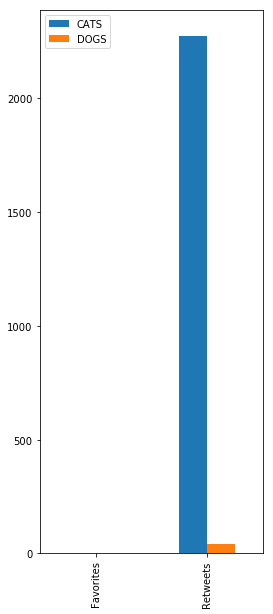

In [10]:
# okay, now for the bar graph
grouped = pd.DataFrame(columns = ['CATS', 'DOGS'])
grouped.set_value('Favorites', 'CATS', cat_fav)
grouped.set_value('Retweets', 'CATS', cat_rt)
grouped.set_value('Favorites', 'DOGS', dog_fav)
grouped.set_value('Retweets', 'DOGS', dog_rt)

grouped.plot.bar(figsize=(4,10))
plt.show()

### The number of favorites vs. the number of retweets, is so different you have to make the height 50 before you even see anything for the favorites, so why not take a closer look with two graphs?.. but this time using total sums instead of means...

In [11]:
#let's take a closer look at that, shall we?
#getting sums
cat_fav_total = tcat_df['tweetFavoriteCt'].sum()
cat_rt_total = tcat_df['tweetRetweetCt'].sum()

dog_fav_total = tdog_df['tweetFavoriteCt'].sum()
dog_rt_total = tdog_df['tweetRetweetCt'].sum()

,CATS,DOGS
Favorites,3838,NaN


,CATS,DOGS
Retweets,12010831,NaN


,CATS,DOGS
Favorites,3838,10625


,CATS,DOGS
Retweets,12010831,564744


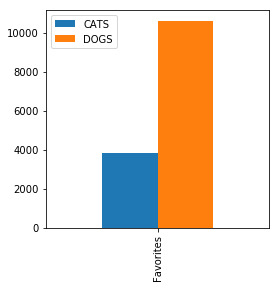

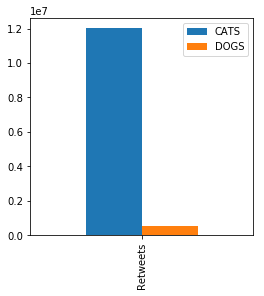

In [12]:
# okay, now for the bar graph, again
fav = pd.DataFrame(columns = ['CATS', 'DOGS'])
rt = pd.DataFrame(columns = ['CATS', 'DOGS'])
fav.set_value('Favorites', 'CATS', cat_fav_total)
rt.set_value('Retweets', 'CATS', cat_rt_total)
fav.set_value('Favorites', 'DOGS', dog_fav_total)
rt.set_value('Retweets', 'DOGS', dog_rt_total)

fav.plot.bar(figsize=(4,4))
plt.show()
rt.plot.bar(figsize=(4,4))
plt.show()

26.536679803636865

73.46332019636314

95.50919938054523

4.4908006194547765

([<matplotlib.patches.Wedge at 0x115f155c0>,
  <matplotlib.text.Text at 0x11604eda0>])

(-1.1878715515438656,
 1.1231293190766627,
 -1.1205800752252828,
 1.1713967424617027)

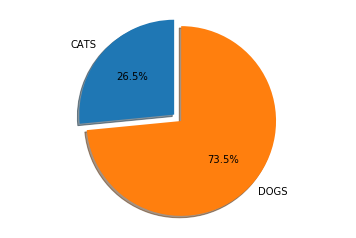

([<matplotlib.patches.Wedge at 0x116098c88>,
  <matplotlib.text.Text at 0x116139d30>])

(-1.1210833933672508,
 1.0936852457730111,
 -1.2120371100431815,
 1.1053351074001636)

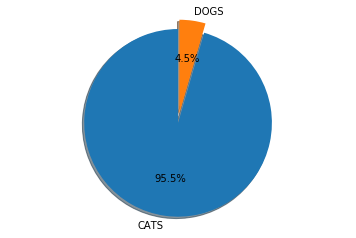

In [13]:
#figuring out percents
cd_fav_sum = cat_fav_total + dog_fav_total
cd_rt_sum = cat_rt_total + dog_rt_total

cat_fav_per = (cat_fav_total/cd_fav_sum)*100
cat_fav_per
dog_fav_per = (dog_fav_total/cd_fav_sum)*100
dog_fav_per

cat_rt_per = (cat_rt_total/cd_rt_sum)*100
cat_rt_per
dog_rt_per = (dog_rt_total/cd_rt_sum)*100
dog_rt_per

#pie charts

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['CATS','DOGS']
sizes = [cat_fav_per, dog_fav_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

labels = ['CATS','DOGS']
sizes = [cat_rt_per, dog_rt_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### It loks like dog posts are more likely to be favorites on average than cat posts on Twitter, but cat posts are more likelt to be retweeted? - this is an interesting change 
### It is also clear that retweeting is much more common than favoriting posts

## Let's look at location and find the most popular place(s) for cat posts vs. dog posts

In [84]:
timecat_df = tcat_df[tcat_df.userTimezone.notnull()]
timecat_df = timecat_df[['Hashtag', 'tweetCreated', 'tweetFavoriteCt', 'tweetID', 'tweetRetweetCt', 'tweetSource', 
                         'userID', 'userLocation', 'userName', 'userScreen', 'userTimezone']]
timecat_df.head()
timecat_df.size

,Hashtag,tweetCreated,tweetFavoriteCt,tweetID,tweetRetweetCt,tweetSource,userID,userLocation,userName,userScreen,userTimezone
0,cat,2017-11-19 04:09:14,0,932098414392893440,5,Tweedle-deee,771578403300401153,"Los Angeles, CA",Daily Cat Fill,DailyCatFill,Pacific Time (US & Canada)
5,cat,2017-11-19 04:09:07,0,932098385665855488,0,twittbot.net,817971712767574023,NaN,cat movie 博士の猫動画&画像,irohamovie,Pacific Time (US & Canada)
7,cat,2017-11-19 04:09:05,0,932098375889043456,1,CatBot13,911431574058602496,America,CatBot,CatBot13,Eastern Time (US & Canada)
8,cat,2017-11-19 04:09:04,0,932098374362214401,2,Twitter for Android,179379870,Beautiful British Columbia,(⌐■_■),Al_SportsLover,Pacific Time (US & Canada)
9,cat,2017-11-19 04:09:04,0,932098372344975361,1,Just Love Kawaii,917714684119257090,NaN,Just Love Kawaii,JustLoveKawaii,Pacific Time (US & Canada)


37136

In [26]:
#Get rid of none values for the timezone
pop_cat = timecat_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
Oregon Coast,3.0,0.0
"Lahore, Punjab, Pakistan",18517.0,0.0
"Last Tango in Wentworth, UK",0.0,0.0
PENNSYLVANIA,3.0,0.0
UK,0.0,0.0


In [60]:
pop_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,1159.000000,1159.000000
mean,4478.327529,0.365175
std,7904.801218,1.834889
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.000000
75%,4630.125000,0.000000
max,38138.000000,30.000000


In [99]:
timedog_df = tdog_df[tdog_df.userTimezone.notnull()]
timedog_df = timedog_df[['Hashtag', 'tweetCreated', 'tweetFavoriteCt', 'tweetID', 'tweetRetweetCt', 'tweetSource', 
                         'userID', 'userLocation', 'userName', 'userScreen', 'userTimezone']]
timedog_df.head()
timedog_df.size

,Hashtag,tweetCreated,tweetFavoriteCt,tweetID,tweetRetweetCt,tweetSource,userID,userLocation,userName,userScreen,userTimezone
0,dog,2017-11-19 04:07:57,0,932098092425396224,30,Twitter for iPhone,1277021305,氷の中,柳生ジル,etude_nine,Irkutsk
1,dog,2017-11-19 04:07:14,0,932097913932488704,0,twittbot.net,741912323556675584,United States,Dog Food for A to Z,dogfoodforatoz,Pacific Time (US & Canada)
2,dog,2017-11-19 04:07:03,0,932097867178655744,0,dlvr.it,1402068510,NaN,The Pets World,MabyMema,Casablanca
3,dog,2017-11-19 04:06:46,0,932097793547649024,0,Instagram,239202335,"Laplace, La",COURTNEY S. WILSON,PUTTY2000,Pacific Time (US & Canada)
4,dog,2017-11-19 04:06:44,0,932097786304258048,0,IFTTT,11497892,東京,デカチワ,dekachiwa,Tokyo


88869

In [98]:
pop_dog = timedog_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
Oregon Coast,3.0,0.0
"Mesa, AZ",9.0,0.0
"19° 1'3.41N, 72°51'22.19E",3.0,0.0
Arizona,3.0,0.0
Colorado now - Heaven Bound,6.0,0.0


In [30]:
pop_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,1742.000000,1742.000000
mean,41.941208,0.814792
std,271.277113,4.614692
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.720779,0.000000
75%,8.000000,0.302198
max,6110.000000,123.000000


#### What can we gather from this so far:
- dogs are retweeted more often than cats, but cats are liked more (Nov, 5) (THIS CHANGED SUDDENLY)  
    -just kidding. cats are retweeted more and dogs are favorited more. (Anytime after Nov, 10)  
    -with old data the above was true but now it is false, that is very interesting.
- cat mean: rt: 4478, fav: 0.36
- dog mean: rt: 41.7, fav: 0.81
- it looks like the cat df has at least 1 extremely popular post with over 30,000 rt
- the most popular dog post is 1/5 of that

## But let's go a little deeper

In [89]:
# finding the locations of the max retweets and the hashtags (cats)
timecat_df['tweetRetweetCt'].max()
#the max is 38138 retweets
timecat_df.index[timecat_df['tweetRetweetCt'] == timecat_df['tweetRetweetCt'].max()].tolist()
# this returns a list of 4: 488, 532, 737, 831
timecat_df['userLocation'][488] #this one os from probably portugal 
timecat_df['Hashtag'][488]      #hashtag: cat

timecat_df['userLocation'][532] #this one is empty
timecat_df['Hashtag'][532]      #hashtag: cat

timecat_df['userLocation'][737] #this one is from singapore
timecat_df['Hashtag'][737]      #hashtag: cat

timecat_df['userLocation'][831] #this one is from singapore
timecat_df['Hashtag'][831]      #hashtag: cat

38138

[488, 532, 737, 831]

"❁❁ nas's feyouncé ❁❁ "

'cat'

nan

'cat'

'singapore'

'cat'

'Singapore'

'cat'

#### Noted trends: the most retweeted cat tweets seem to be from singapore, and the cat hashtag seems to be the most popular.

In [92]:
# finding the locations of the max retweets and the hashtags (dogs)
timedog_df['tweetRetweetCt'].max()
#the max is 6110 retweets
timedog_df.index[timedog_df['tweetRetweetCt'] == timedog_df['tweetRetweetCt'].max()].tolist()
# this returns a list of 3: 3162, 3176, 3190
timedog_df['userLocation'][3162] #this one is empty
timedog_df['Hashtag'][3162]      #hashtag: dog

timedog_df['userLocation'][3176] #this one is from Poquoson, Virginia
timedog_df['Hashtag'][3176]      #hashtag: dog

timedog_df['userLocation'][3190] #this one is from Phoenix, Arizona
timedog_df['Hashtag'][3190]      #hashtag: dog

6110

[3162, 3176, 3190]

nan

'dog'

'Poquoson, Virginia USA'

'dog'

'Phoenix - 85020'

'dog'

#### Noted trends: Popularly retweeted dog tweets seem to come from America and dog seems to be the prefered hashtag

In [94]:
# finding the locations of the max favorites and the hashtags (cats)
timecat_df['tweetFavoriteCt'].max()
#the max is 118
timecat_df.index[timecat_df['tweetFavoriteCt'] == timecat_df['tweetFavoriteCt'].max()].tolist()
# this returns a list of 1: 3489
timecat_df['userLocation'][3489] #this one is form somewhere in the US
timecat_df['Hashtag'][3489]      #hashtag: cat

118

[3489]

'United States'

'cat'

#### Noted trend: the most favorited cat tweet is from America, and the hashtag is still cat, so it seems there is a strong preference for the more simple hashtags rather than the newer/more particular ones

In [100]:
# finding the locations of the max favorites and the hashtags (dogs)
timedog_df['tweetFavoriteCt'].max()
#the max is 118
timedog_df.index[timedog_df['tweetFavoriteCt'] == timedog_df['tweetFavoriteCt'].max()].tolist()
# this returns a list of 1: 6825
timedog_df['userLocation'][6825] #this one is empty
timedog_df['Hashtag'][6825]      #hashtag: dog

140

[6825]

'茨城県取手市'

'dog'

#### Noted trend: the most favorited dog tweet is from somewhere in Japan ([Toride, Ibaraki](https://en.wikipedia.org/wiki/Toride,_Ibaraki)), and the hashtag is still dog, so it seems there is a strong preference for the more simple hashtags rather than the newer/more particular ones

## Moving on to Timezone  

In [114]:
tz_cat = timecat_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_cat.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Abu Dhabi,18517.000000,0.000000
Adelaide,6172.666667,0.500000
Alaska,2388.615385,0.205128
America/Anguilla,0.000000,0.000000
America/Chicago,1854.600000,0.300000


In [102]:
tz_cat.describe()

,tweetRetweetCt,tweetFavoriteCt
count,108.000000,108.000000
mean,4958.203298,0.509712
std,6468.719789,1.480354
min,0.000000,0.000000
25%,2.925000,0.000000
50%,1964.207407,0.000000
75%,8115.061905,0.308355
max,18857.000000,11.600000


In [103]:
tz_dog = timedog_df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
tz_dog.head()

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Abu Dhabi,128.200000,0.000000
Adelaide,1.111111,1.111111
Alaska,28.753425,0.438356
Almaty,409.000000,0.000000
America/Argentina/Buenos_Aires,0.000000,1.000000


In [104]:
tz_dog.describe()

,tweetRetweetCt,tweetFavoriteCt
count,134.000000,134.000000
mean,59.464546,0.567645
std,115.471011,0.992410
min,0.000000,0.000000
25%,1.000000,0.000000
50%,10.016667,0.250000
75%,36.192630,0.829545
max,612.400000,9.000000


## Finding the most popular retweet timezones  
### First, cats

In [107]:
# finding the timezone of the max retweets (cats)
tz_cat['tweetRetweetCt'].max()
#the max is 18857 retweets
tz_cat.index[tz_cat['tweetRetweetCt'] == tz_cat['tweetRetweetCt'].max()].tolist()

18857.0

['Dublin']

#### What's happening here:
- the most popular timezone for cat retweets is Dublin, Germany
- full bar plot can be seen below

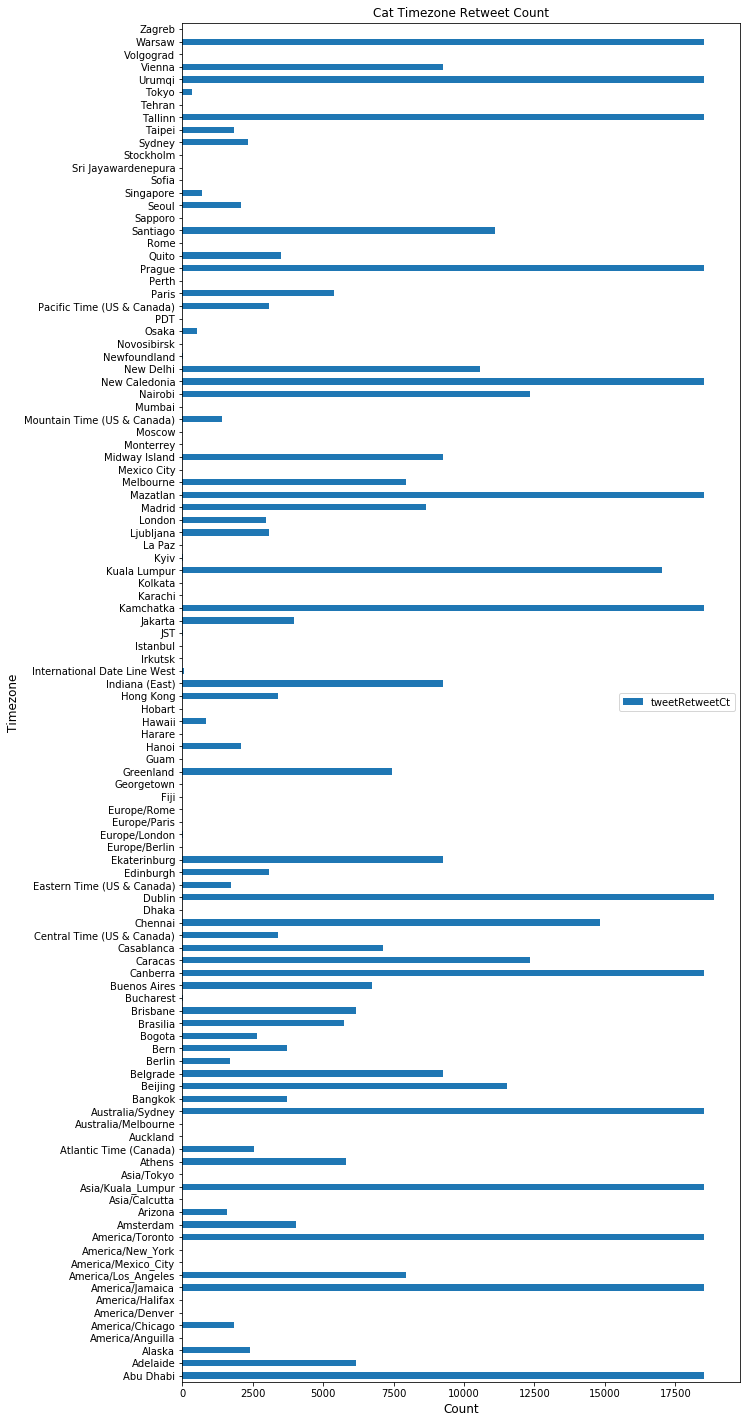

In [168]:
#bar plot for cat retweet counts
ax = tz_cat['tweetRetweetCt'].plot(kind='barh', title ="Cat Timezone Retweet Count", figsize=(10, 25), 
                                    legend=True, fontsize=10)
ax.set_ylabel("Timezone", fontsize=12)
ax.set_xlabel("Count", fontsize=12)
plt.show()